#**Importing Librarys**

In [1]:
#importing librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df = pd.read_csv('/content/Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [3]:
#size of the dataset
df.shape

(366, 12)

In [4]:
#column of the dataset contains
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [5]:
#statical describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


## Data Cleaning

In [6]:
#null values
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [7]:
#names of the column
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [8]:
#removing space

df.rename(str.strip,
          axis='columns',
          inplace=True)

df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [9]:
for col in df.columns:

  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)

df.isnull().sum().sum()

np.int64(0)

In [10]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


## Exploratory Data Analysis (EDA)

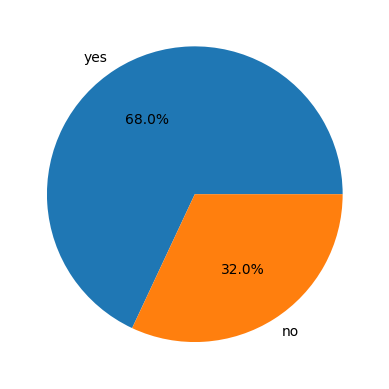

In [11]:
#rainfall column
plt.pie(df['rainfall'].value_counts().values,
        labels = df['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [12]:
#mean
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


In [13]:
#numerical data except day
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


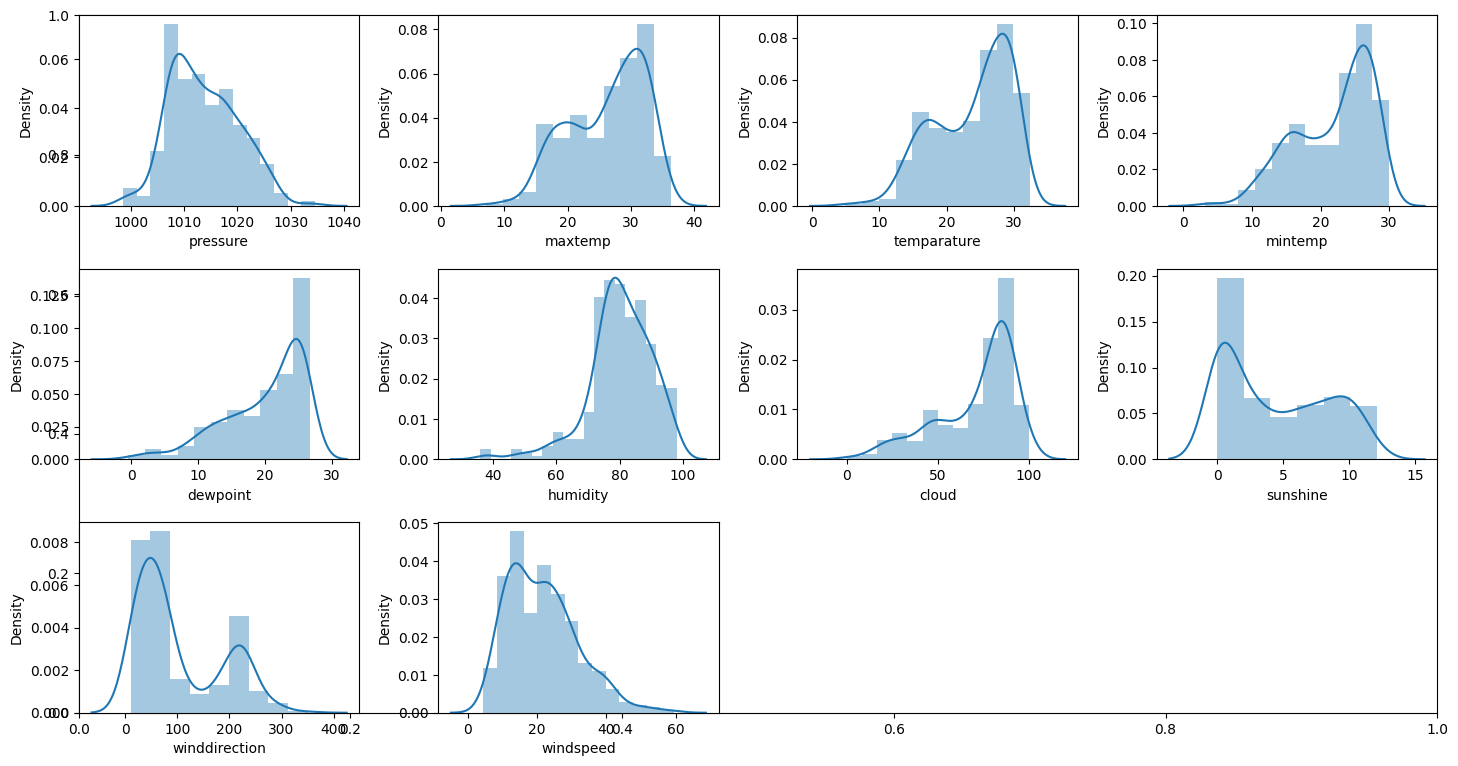

In [14]:
#series of distribution plots
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

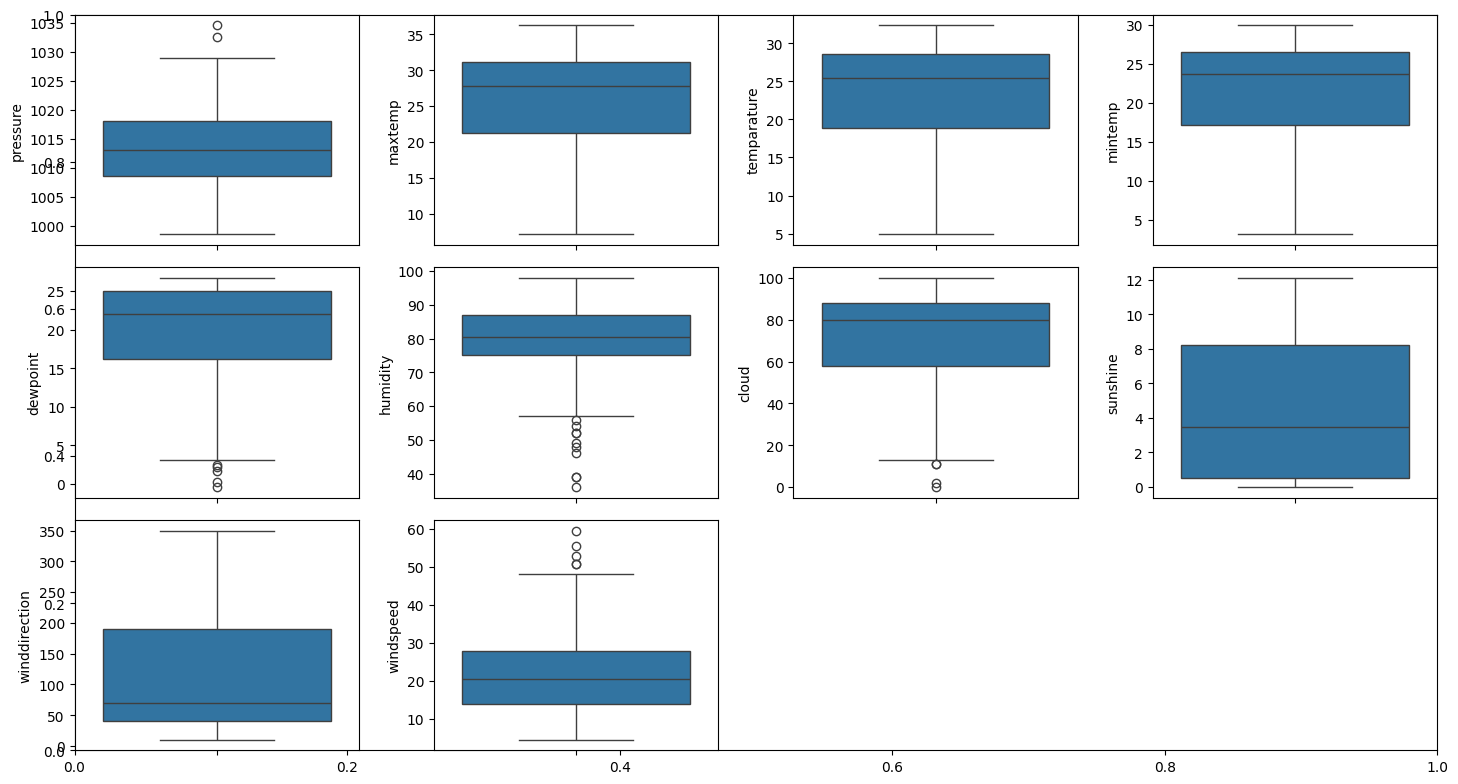

In [15]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [16]:
#managing the outliers
df.replace({'yes':1, 'no':0}, inplace=True)

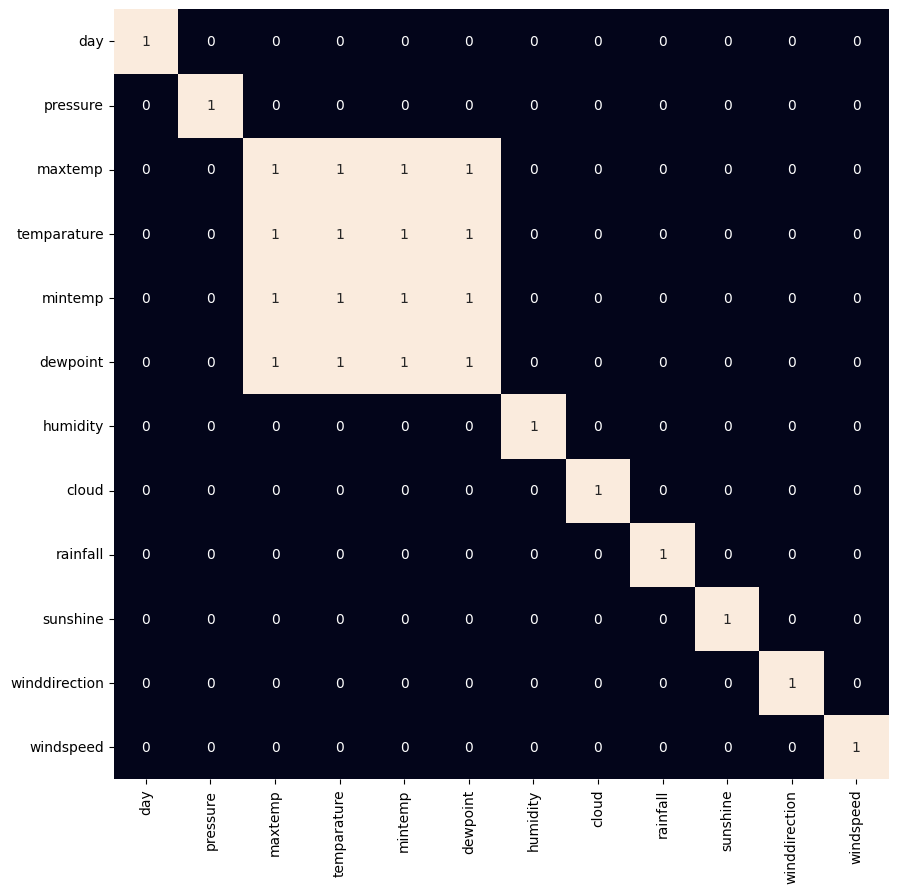

In [17]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [18]:
#removing highly corelated values
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

## Model Training

In [19]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall

X_train, X_val, \
    Y_train, Y_val = train_test_split(features,
                                      target,
                                      test_size=0.2,
                                      stratify=target,
                                      random_state=2)
# balance by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [20]:
#  logistic regression
from sklearn import metrics # import the metrics module

model = LogisticRegression()
model.fit(X, Y)
y_pred = model.predict(X_val)
print(metrics.classification_report(Y_val, y_pred))
print(metrics.accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.88      0.90      0.89        50

    accuracy                           0.85        74
   macro avg       0.83      0.82      0.83        74
weighted avg       0.85      0.85      0.85        74

0.8513513513513513


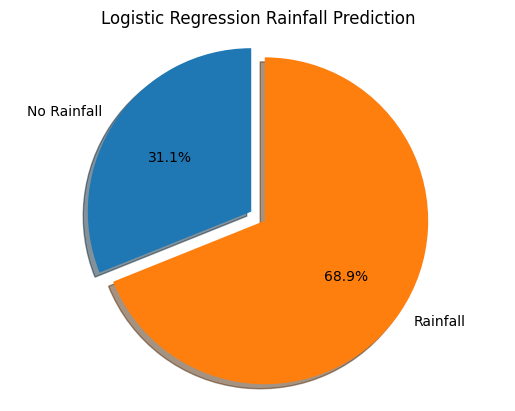

In [21]:
#  piechart visulisation of logistic regression

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_val, y_pred)

labels = ['No Rainfall', 'Rainfall']
sizes = [cm[0][0] + cm[1][0], cm[0][1] + cm[1][1]]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Logistic Regression Rainfall Prediction')
plt.show()

In [22]:
#  code for svc
model = SVC()
model.fit(X, Y)

# Predicting the target variable
Y_pred = model.predict(X_val)

# Evaluating the model
print(metrics.classification_report(Y_val, Y_pred))
print(metrics.confusion_matrix(Y_val, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.85      0.94      0.90        50

    accuracy                           0.85        74
   macro avg       0.85      0.80      0.82        74
weighted avg       0.85      0.85      0.85        74

[[16  8]
 [ 3 47]]


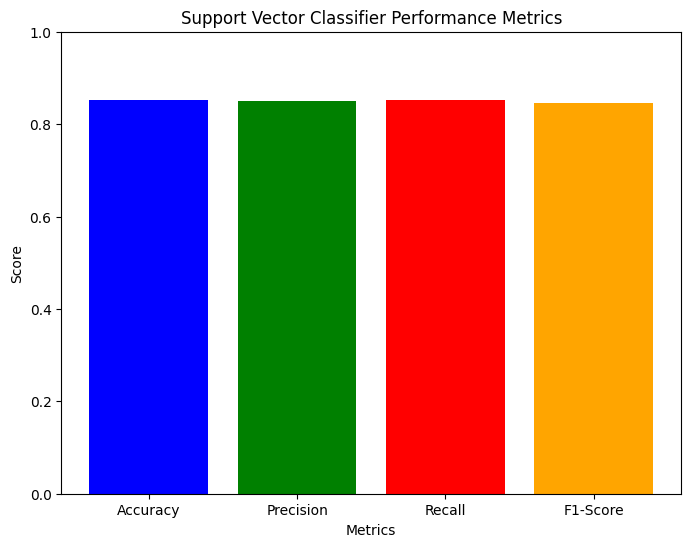

In [23]:
# barchart visulisation of svc

# Importing the necessary function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_val, Y_pred)
precision = precision_score(Y_val, Y_pred, average='weighted')
recall = recall_score(Y_val, Y_pred, average='weighted')
f1 = f1_score(Y_val, Y_pred, average='weighted')

# Create a bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'red', 'orange'])
plt.title('Support Vector Classifier Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.show()

## Prediction

Predicted rainfall for 2025: 677.93 mm
Mean Squared Error: 67440.34


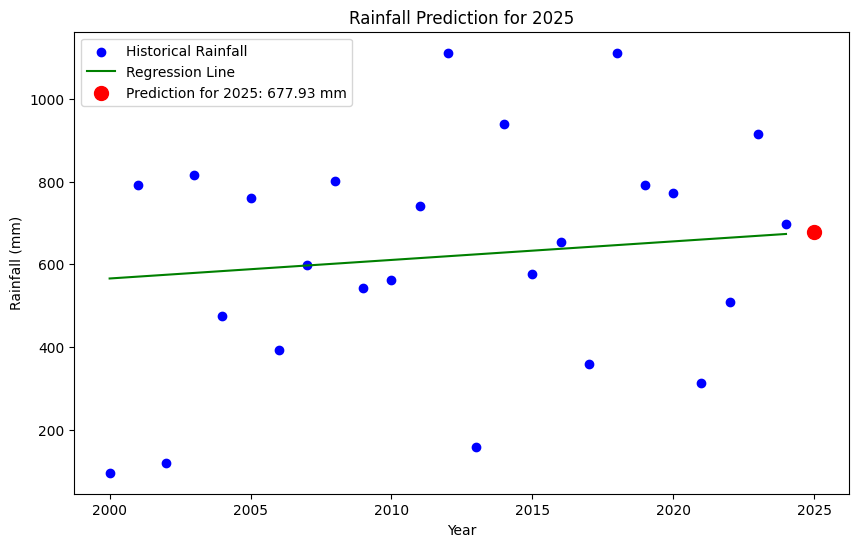

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
years = np.arange(2000, 2025)
rainfall = np.random.rand(len(years)) * 1000

# Convert to DataFrame for easier handling
df = pd.DataFrame({'Year': years, 'Rainfall': rainfall})

# Split data into features (X) and target (y)
X = df[['Year']]
y = df['Rainfall']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)
# Create a trend for increasing rainfall
df['Rainfall'] = df['Rainfall'] + (df['Year'] - 2000) * 10

# Re-train the model
X_train, X_test, y_train, y_test = train_test_split(X, df['Rainfall'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)


# Predict rainfall for 2025
year_2025 = np.array([[2025]])  # Year to predict
rainfall_2025 = model.predict(year_2025)
print(f"Predicted rainfall for 2025: {rainfall_2025[0]:.2f} mm")

# Evaluate the model on test data (optional)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the original data and prediction for 2025
plt.figure(figsize=(10, 6))

# Plot the training data
plt.scatter(df['Year'], df['Rainfall'], color='blue', label='Historical Rainfall')

# Plot the model's predictions for training data
plt.plot(df['Year'], model.predict(df[['Year']]), color='green', label='Regression Line')

# Highlight the prediction for 2025
plt.scatter(2025, rainfall_2025, color='red', label=f'Prediction for 2025: {rainfall_2025[0]:.2f} mm', s=100)

# Add labels, title, and legend
plt.title('Rainfall Prediction for 2025')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()

# Display the plot
plt.show()

# New Section